<a href="https://colab.research.google.com/github/Valeeew/Data_management_of_an_online_store/blob/master/Data_management_of_an_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Management & Optimisation d'une boutique en ligne
## Par Valentin MONTEIRO 
---
### Sommaire
> ### IMPORT
- [Import des library](#scrollTo=tAgUgPb2dUt3&line=1&uniqifier=1)
- [Import des DATA](#scrollTo=LGGkJyQgd2Vc&line=3&uniqifier=1)
> #### Traitement des DATA
>> - [df_web](#scrollTo=THwlX1u91f2t&line=4&uniqifier=1)
>> - [df_liaison](#scrollTo=ykl7KSWzVFsA&line=1&uniqifier=1)❓
- [Lexique des données](#scrollTo=oG89DAzeosCW&line=1&uniqifier=1)

> ### Objectifs
- [Objectifs](#scrollTo=zVQGfyVrRI86&line=15&uniqifier=1)

> ### Code
>> - [Rapprocher les 2 exports](#scrollTo=VpQfY-tkWMYh&line=2&uniqifier=1)
>> - [Calcul CA (turnover) par produit](#scrollTo=nGntr2d-xQYs&line=1&uniqifier=1)
>> - [Calcul du CA (turnover) des ventes en ligne](#scrollTo=dwOAg5jrtGl2&line=1&uniqifier=1)
>> ### Mise en Évidence des Outliers
>>> - [Création des graphiques](#scrollTo=5XuD8uES_19X&line=1&uniqifier=1)
>>> - [Création des fonctions Outliers](#scrollTo=70cVYyx7KKSy&line=1&uniqifier=1)
>>> - [Création des DATAframes Ouliers](#scrollTo=4VqetTeIWg3b&line=2&uniqifier=1)

> ## __Exposé__
> - [Données complètes](#scrollTo=G1T8nOXJnHOO&line=1&uniqifier=1)
> - [Chiffre d'affaire par produit](#scrollTo=QZ-LVxLArtOT&line=1&uniqifier=1)
> - [Chiffre d'affaire en ligne](#scrollTo=dUJYCPemr3Ua&line=1&uniqifier=1)
> - [Répartion des prix](#scrollTo=MXm8pDFbA85K&line=1&uniqifier=1)
> - [Visualisation des Outliers](#scrollTo=t7L5Vc7TDRuh&line=1&uniqifier=1)
> - [Liste des outliers](#scrollTo=PCy8bK4gDlQM&line=8&uniqifier=1)
> - [Produit à vérifier](#scrollTo=b71DPo3VGAiC&line=1&uniqifier=1)



## IMPORT

---
> ### Import des Libraries
---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#!pip install --upgrade "openpyxl== 3.0.0"
!pip install valeeew
from valeeew import cleaning as cl

---
> ### Import des DATA from Github
---




In [2]:
# Clone the entire repo & import DATA
!git clone -l -s git://github.com/Valeeew/Data_management_of_an_online_store cloned-repo
%cd cloned-repo
!ls

# Enregistrement des DATA dans les DATAframe
df_erp = pd.read_excel("erp.xlsx")
df_liaison = pd.read_excel("liaison.xlsx")
df_web = pd.read_excel("web.xlsx")

fatal: destination path 'cloned-repo' already exists and is not an empty directory.
/content/cloned-repo
Data_management_of_an_online_store.ipynb  erp.xlsx     liaison.xlsx  web.xlsx
erp.csv					  liaison.csv  web.csv


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


---
> ### Traitement des DATA
---




#### df_web

Duplicate and null DATA 

Total missing value 
 
 sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64 

Percentage of missing value 
 
 virtual                    0.00
downloadable               0.00

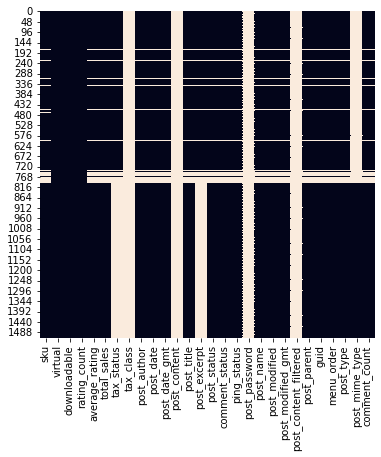

In [3]:
cl.watch(df_web)

In [4]:
# Il semble que toutes les données soit toujours publié en double, seul le post_type change.
verification = df_web[(df_web.sku == 15298) == True]
verification

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [5]:
# Traitement des données web inutiles
#df_web = df_web.drop(["virtual","downloadable","rating_count","average_rating","tax_class","post_content","comment_status","ping_status","post_password","post_content_filtered","post_parent","menu_order","comment_count"], axis = 1)
# Remplacement des données NaN dans df_web.total_sales
df_web.total_sales = df_web.total_sales.fillna(0)
# Remplacement des données tax_status ➡️ taxable = 1 et Nan = 0
# Suppression des lignes qui ne sont pas taxées
df_web = df_web[df_web.tax_status.notnull()]
#df_web.tax_status = df_web.tax_status.replace("taxable",1)
web_pk = df_web.sku.unique().shape
# vérification de la clé primaire sku 
print(df_web.sku.duplicated)
print(df_web.shape)

<bound method Series.duplicated of 0      bon-cadeau-25-euros
1                    15298
2                    15296
3                    15300
4                    19814
              ...         
762                  16135
767                  15891
768                  15887
797                13127-1
798                  16230
Name: sku, Length: 716, dtype: object>
(716, 28)


#### df_liaison

Null DATA and nothing duplicate 

Total missing value 
 
 product_id     0
id_web        91
dtype: int64 

Percentage of missing value 
 
 product_id     0.00
id_web        11.03
dtype: float64 

Empty DataFrame
Columns: [product_id, id_web]
Index: [] 



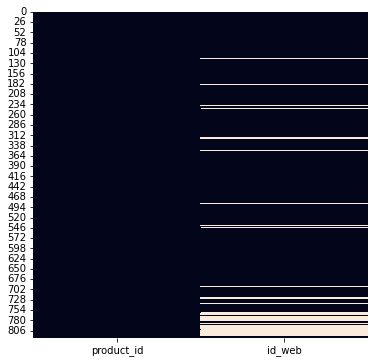

In [6]:
cl.watch(df_liaison)

#### df_erp

No duplicate and no null DATA 

Total missing value 
 
 product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64 

Percentage of missing value 
 
 product_id        0.0
onsale_web        0.0
price             0.0
stock_quantity    0.0
stock_status      0.0
dtype: float64 

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: [] 



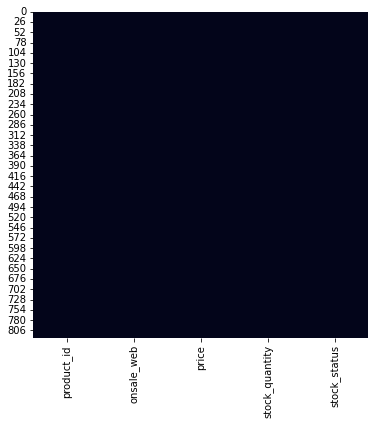

In [7]:
cl.watch(df_erp)

---
> ### Lexique des données
---





#### df_erp

| Variable | Description | Type | PK |
| :--------------- |:---------------| :-----| :---|
| product_id | références produit | int | ✅ |
| onsale_web | vendu en ligne | boolean ||
| price | prix de vente | float ||
| stock_quantity | quantité dans le stock | int ||
|stock_status | État de stock | str ||

#### df_web

| Variable | Description | Type | PK |
| :--------------- |:---------------| :-----| :---|
| sku | références produit | int | ✅ |
| total_sales | nombre de vente | Int ||
| tax_status | produit taxable ou non | Boolean ||
| post_author | auteur de l'article | int ||
| post_date | Date de publication | date ||
| post_date_gmt | Date de publication h GMT| date ||
| post_title | titre de l'article | str ||
| post_excerpt | description de l'article | str ||
| post_status | statut de l'article | str ||
| post_name | Nom de l'article | str ||
| post_modified | Date dernière MAJ | date ||
| post_modified_gmt | Date dernière MAJ h GMT | date ||
| guid | lien | str ||
| post_type | type de l'article | str ||
| post_mime_type | Chemin de l'image | str ||

## Objectifs


- Rapprocher les 2 exports
- Chiffre d’affaires par produit
- Total du chiffre d’affaires réalisé en ligne.
- Analyser la variable price
- - Détecter d’éventuelles valeurs aberrantes
- - Lister les valeur aberrantes 
- - Faire une représentation graphique


## Code


---
>#### Rapprocher les 2 exports
---

In [8]:
# Merge df_erp & df_liaison
df_verification_erp_liaison = df_erp.merge(df_liaison, how="outer", right_on="product_id", left_on="product_id", indicator=True)
df_erp_liaison = df_erp.merge(df_liaison, how="inner", right_on="product_id", left_on="product_id")
print(df_verification_erp_liaison.shape, df_erp_liaison.shape, df_verification_erp_liaison._merge.unique())
# Aucune corruption des Données

(825, 7) (825, 6) ['both']
Categories (3, object): ['left_only', 'right_only', 'both']


In [9]:
# Merge liaison & web en outer
df_verification_liaison_web = df_liaison.merge(df_web, how="outer", right_on="sku", left_on="id_web", indicator=True)
print(df_verification_liaison_web._merge.unique())

['both', 'left_only']
Categories (3, object): ['left_only', 'right_only', 'both']


In [10]:
# Des données sont manquente dans le df_web
df_manquant = cl.keep(df_verification_liaison_web, "_merge", "left_only")
print(df_manquant)

     product_id   id_web  sku  ...  post_mime_type  comment_count     _merge
367        4289    13771  NaN  ...             NaN            NaN  left_only
409        4568    15065  NaN  ...             NaN            NaN  left_only
412        4584    14785  NaN  ...             NaN            NaN  left_only
516        4741    12601  NaN  ...             NaN            NaN  left_only
550        4864    15154  NaN  ...             NaN            NaN  left_only
553        4869    14360  NaN  ...             NaN            NaN  left_only
581        4921    15608  NaN  ...             NaN            NaN  left_only
582        4922    15586  NaN  ...             NaN            NaN  left_only
625        5018    15272  NaN  ...             NaN            NaN  left_only
627        5021    15630  NaN  ...             NaN            NaN  left_only
675        5505    14648  NaN  ...             NaN            NaN  left_only
692        5559    14715  NaN  ...             NaN            NaN  left_only

In [11]:
# Afin de pouvoir répondre aux besoin, je décide de merge en inner
# Merge df_erp_liaison & df_web en inner
df_bottleneck = df_erp_liaison.merge(df_web, how="inner", right_on="sku", left_on="id_web")

---
>#### Calcul du CA (turnover) produit
---

In [12]:
# Création d'une colone chiffre d'affaire par produit
df_bottleneck["turnover"] = df_bottleneck.price * df_bottleneck.total_sales
# Création d'un DATA frame ca pour exposer mon résultat
ca = df_bottleneck[["product_id","post_name","onsale_web","price","total_sales","turnover"]]

---
> #### Calcul du CA (turnover) des vente en ligne
---

In [13]:
# Isolation des ventes en ligne
df_bottleneck_online = df_bottleneck[(df_bottleneck.onsale_web == 1) == True]
# Calcul du total du CA
turnover_online = df_bottleneck_online.turnover.sum()

---
> #### Mise en évidence des Outliers
---

##### Creation des Graphiques

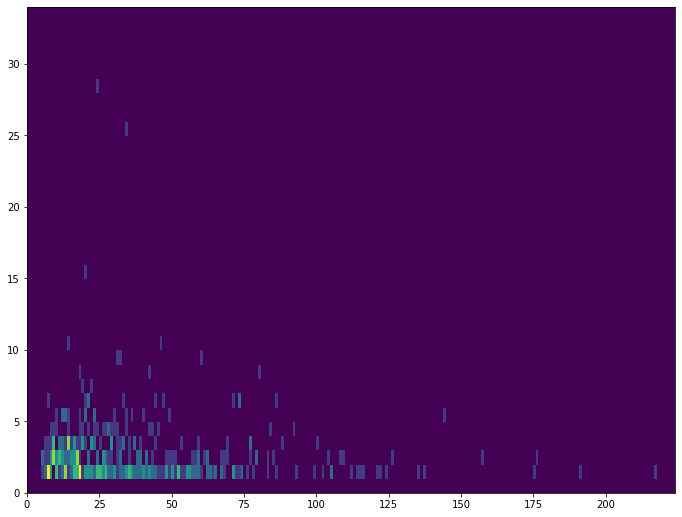

In [14]:
# Création d'une variable attribution des prix
attribution_prix = df_bottleneck.price.value_counts()
# Isolation de chaque prix pour les mettres en corélation avec l'attribution des prix
prix = df_bottleneck.price.unique()
# Création du graphique de la répartition des prix
repartition_des_prix = plt.figure(figsize=(12,9))
ax = repartition_des_prix.add_axes([0.15,0.15,0.75,0.75])
ax.hist2d(prix, attribution_prix, bins=(np.arange(0, 225, 1), np.arange(0 , 35, 1)))
plt.show(repartition_des_prix)

<function matplotlib.pyplot.show>

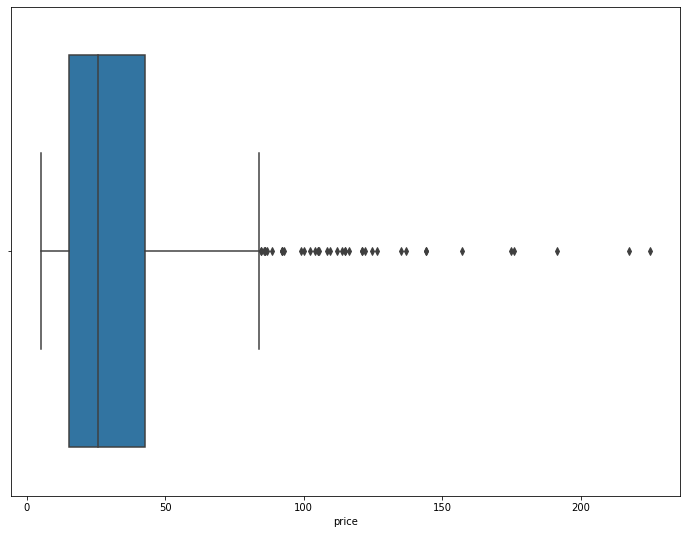

In [15]:
# Création d'un boxplot afin de mettre en évidence les outliers
outliers_prix = plt.figure(figsize=(12,9))
sns.boxplot(x = df_bottleneck.price)
plt.show

##### Création des fonction Outliers

In [16]:
# Création de la fonction Z-scoring
def z_score(data):
  resultat_outliers = []
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)
  
  for i in data:
# Formule Z-scoring ➡️ score > 3
    score = (i-mean)/std
    if np.abs(score) > threshold:
      resultat_outliers.append(i)
  return resultat_outliers

In [17]:
# Création de la Fonction IQR
def outliers_IQR(data):
  q1 = np.quantile(data, 0.25)
  q3 = np.quantile(data, 0.75)
  resultat_outliers = []
  iqr = q3-q1
# Formule IQR
  lower_range = q1 - 1.5*iqr
  upper_range = q3 + 1.5*iqr
  for i in data:
    if i < lower_range  or i > upper_range:
      resultat_outliers.append(i)
  return resultat_outliers

##### Création des DATAframes

In [18]:
# Récupération de l'outlier minimum selon Z-score
since_z_score = min(z_score(df_bottleneck.price))
# Récupération de l'outlier minimum selon IQR
since_iqr = min(outliers_IQR(df_bottleneck.price))
# Création d'un DATAframe des outliers en fonction du Z-score
outliers_prix_z_score = df_bottleneck[(df_bottleneck.price >= since_z_score) == True]
# Création d'un DATAframe des outliers en fonction IQR
outliers_prix_iqr = df_bottleneck[(df_bottleneck.price >= since_iqr) == True]

# __Exposé__


---
> ### Données Complètes
---
[Liaison des DATAframes](#scrollTo=VpQfY-tkWMYh&line=3&uniqifier=1)

In [19]:
df_bottleneck

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,turnover
0,3847,1,24.2,0,outofstock,15298,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,1,14.1,0,outofstock,19814,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,1,46.0,0,outofstock,19815,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,6930,1,8.4,83,instock,16135,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.0
892,7023,1,27.5,15,instock,15891,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,closed,closed,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
893,7025,1,69.0,2,instock,15887,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,closed,closed,NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
894,7247,1,54.8,23,instock,13127-1,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,NaN,clos-

---
> ### Chiffre d'affaire par produit
---
[Calcul du chiffre d'affaire par produit](#scrollTo=nGntr2d-xQYs&line=2&uniqifier=1)

In [20]:
ca

,product_id,post_name,onsale_web,price,total_sales,turnover
0,3847,pierre-jean-villa-saint-joseph-preface-2018,1,24.2,6.0,145.2
1,3849,pierre-jean-villa-saint-joseph-tilde-2017,1,34.3,0.0,0.0
2,3850,pierre-jean-villa-croze-hermitage-accroche-coe...,1,20.8,0.0,0.0
3,4032,pierre-jean-villa-igp-gamine-2018,1,14.1,3.0,42.3
4,4039,pierre-jean-villa-cote-rotie-carmina-2017,1,46.0,0.0,0.0
...,...,...,...,...,...,...
891,6930,mouthes-le-bihan-aime-chai-2015,1,8.4,5.0,42.0
892,7023,camin-larredya-jurancon-sec-la-virada-2018,1,27.5,0.0,0.0
893,7025,jamet-cote-rotie-fructus-voluptas-2018,1,69.0,0.0,0.0
894,7247,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,1,54.8,0.0,0.0


---
> ### Chiffre d'affaire en ligne
---
[Calcul du Chiffre d'affaire en ligne](#scrollTo=dwOAg5jrtGl2&line=1&uniqifier=1)

In [21]:
print(turnover_online)

70568.6


---
> ### Répartition des prix
---
[Création du graphique répartion des prix](#scrollTo=5XuD8uES_19X&line=6&uniqifier=1)


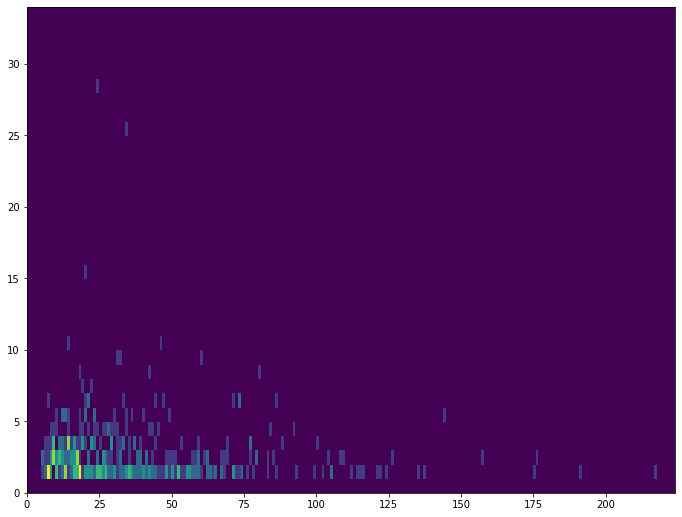

In [22]:
repartition_des_prix

---
> ### Visualisation des Outliers
---
[Création du Boxplot](#scrollTo=nGhqsYgEHxIo&line=2&uniqifier=1)

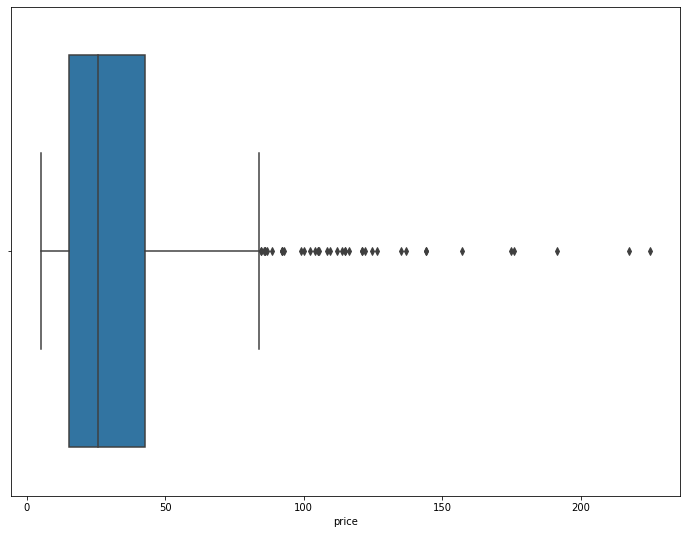

In [23]:
outliers_prix

---
> ### Listes des Outliers
---
[Calcul des définitions des outliers](#scrollTo=70cVYyx7KKSy&line=21&uniqifier=1)

In [24]:
print("IQR")
print(outliers_IQR(df_bottleneck.price))
print("Outliers à partir de:")
print(since_iqr)
print("-------")
print("Z-score")
print(z_score(df_bottleneck.price))
print("Outliers à partir de:")
print(since_z_score)

IQR
[86.1, 86.1, 144.0, 144.0, 84.7, 84.7, 92.0, 92.0, 100.0, 88.4, 225.0, 126.5, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]
Outliers à partir de:
84.7
-------
Z-score
[144.0, 144.0, 225.0, 126.5, 176.0, 157.0, 137.0, 217.5, 112.0, 124.8, 175.0, 191.3, 122.0, 114.0, 135.0, 116.4, 115.0, 121.0, 115.0, 121.0]
Outliers à partir de:
112.0


---
> ### Produit à vérifier
---
[Création des listes](#scrollTo=4VqetTeIWg3b&line=4&uniqifier=1)

In [25]:
outliers_prix_iqr.shape

(40, 35)

In [26]:
outliers_prix_z_score.shape

(20, 35)